<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/agapi_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AtomGPT.org API (AGAPI) Client

https://github.com/atomgptlab/agapi

References to cite:

1. https://doi.org/10.1016/j.commatsci.2025.114063
2. https://doi.org/10.1007/s40192-025-00410-9

In [ ]:
!pip install -q agapi jarvis-tools


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 48.0 MB/s eta 0:00:00


## Get your AtomGPT API Key



Go to Website: https://atomgpt.org/

Navigate to Profile >> Settings >> Account >> API Keys >> Show/Create

It will look like sk-xxxxxxxxxxxxx paste below

In [ ]:
api_key = "sk-"

In [ ]:
from agapi.client import Agapi
client = Agapi(api_key=api_key)
r = client.ask("Whats the capital of US")
print(r)

The capital of the United States is **Washington, D.C.**


In [ ]:
import pandas as pd

## Queries JARVIS-DFT entries with formula MoS2

In [ ]:
%%time
r = client.jarvis_dft_query(formula="MoS2")
print(pd.DataFrame(r['results']))


            jid search formula spg_symbol  formation_energy_peratom  \
0     JVASP-228  -Mo-S    MoS2       R-3m                  -0.69909   
1   JVASP-28379  -Mo-S    MoS2   P6_3/mmc                  -0.95754   
2   JVASP-28413  -Mo-S    MoS2      P-3m1                  -0.92268   
3      JVASP-51  -Mo-S    MoS2        R3m                  -0.96150   
4    JVASP-8398  -Mo-S    MoS2      I-42d                  -0.32077   
5   JVASP-58505  -Mo-S    MoS2      F-43m                  -0.72675   
6   JVASP-28733  -Mo-S    MoS2   P6_3/mmc                  -0.96160   
7      JVASP-54  -Mo-S    MoS2   P6_3/mmc                  -0.96153   
8   JVASP-34138  -Mo-S    MoS2   P6_3/mmc                  -0.96135   
9  JVASP-111117  -Mo-S    MoS2      P-3m1                  -0.69305   

   optb88vdw_bandgap                                                XML  
0              0.000  <a href="https://www.ctcms.nist.gov/~knc6/stat...  
1              0.958  <a href="https://www.ctcms.nist.gov/~knc6/stat..

In [ ]:
print(r['results'][0].keys())

dict_keys(['jid', 'search', 'formula', 'spg_symbol', 'formation_energy_peratom', 'optb88vdw_bandgap', 'XML'])


In [ ]:
!wget https://raw.githubusercontent.com/atomgptlab/agapi/refs/heads/main/agapi/images/POSCAR -O POSCAR

--2025-09-19 19:54:54--  https://raw.githubusercontent.com/atomgptlab/agapi/refs/heads/main/agapi/images/POSCAR
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 194 [text/plain]
Saving to: ‘POSCAR’

POSCAR              100%[===================>]     194  --.-KB/s    in 0s      

2025-09-19 19:54:54 (3.88 MB/s) - ‘POSCAR’ saved [194/194]



In [ ]:
!ls

POSCAR	sample_data


# Get ALIGNN Predictions

Note: We recommend avoiding systems with more than 20 atoms. AGAPI is still under active development, and support for larger systems will improve as we expand computational resources.

In [ ]:
%%time
r = client.alignn_query(file_path="POSCAR")

CPU times: user 6.05 ms, sys: 1 ms, total: 7.05 ms
Wall time: 5.08 s


In [ ]:
r

{'jv_formation_energy_peratom_alignn': [0.0007288381457328796],
 'jv_optb88vdw_total_energy_alignn': [-4.080363750457764],
 'jv_optb88vdw_bandgap_alignn': [0.04157217592000961],
 'jv_mbj_bandgap_alignn': [0.49050453305244446],
 'jv_bulk_modulus_kv_alignn': [82.80049896240234],
 'jv_shear_modulus_gv_alignn': [58.17045974731445],
 'jv_dfpt_piezo_max_dielectric_alignn': [13.689010620117188],
 'jv_supercon_tc_alignn': [4.345114231109619]}

## Use ALIGNN-FF to relax atomic structure

In [ ]:
%%time
r = client.alignn_ff_query(poscar_string=open("POSCAR").read())

CPU times: user 3.03 ms, sys: 992 µs, total: 4.02 ms
Wall time: 2.43 s


In [ ]:

r

{'original': 'System\n1.0\n5.0 0.0 0.0\n0.0 5.0 0.0\n0.0 0.0 5.0\nSi \n8 \ndirect\n0.25 0.75 0.25 Si\n0.0 0.0 0.5 Si\n0.25 0.25 0.75 Si\n0.0 0.5 0.0 Si\n0.75 0.75 0.75 Si\n0.5 0.0 0.0 Si\n0.75 0.25 0.25 Si\n0.5 0.5 0.5 Si\n',
 'relaxed': 'System\n1.0\n5.470787517250322 -7.874118036978418e-10 -5.344152522281753e-09\n-7.874118036978418e-10 5.470787508861865 -9.088179145559647e-09\n-5.344152522281753e-09 -9.088179145559647e-09 5.4707875293821555\nSi \n8 \ndirect\n0.24999987068642568 0.7499996379635093 0.24999988333876738 Si\n8.790082340738054e-09 2.096334255929517e-08 0.4999997727555236 Si\n0.24999987974448196 0.24999990295640398 0.7499996553422311 Si\n1.3840674677657051e-08 0.4999997690246459 1.2627604599316064e-08 Si\n0.749999652471135 0.7499996450553673 0.7499996650166192 Si\n0.4999997857087469 1.770299688206779e-08 -3.1390777133251844e-09 Si\n0.7499996592392656 0.24999986358791804 0.24999986323558915 Si\n0.49999977097039683 0.4999997641650365 0.49999978303536796 Si\n'}

In [ ]:
from jarvis.io.vasp.inputs import Poscar
orig = Poscar.from_string(r['original'])
print(orig)

System
1.0
5.0 0.0 0.0
0.0 5.0 0.0
0.0 0.0 5.0
Si
8
direct
0.25 0.75 0.25 
0.0 0.0 0.5 
0.25 0.25 0.75 
0.0 0.5 0.0 
0.75 0.75 0.75 
0.5 0.0 0.0 
0.75 0.25 0.25 
0.5 0.5 0.5 



In [ ]:
relaxed = Poscar.from_string(r['relaxed'])
print(relaxed)

System
1.0
5.470787517250322 -7.874118036978418e-10 -5.344152522281753e-09
-7.874118036978418e-10 5.470787508861865 -9.088179145559647e-09
-5.344152522281753e-09 -9.088179145559647e-09 5.4707875293821555
Si
8
direct
0.24999987068642568 0.7499996379635093 0.24999988333876738 
8.790082340738054e-09 2.096334255929517e-08 0.4999997727555236 
0.24999987974448196 0.24999990295640398 0.7499996553422311 
1.3840674677657051e-08 0.4999997690246459 1.2627604599316064e-08 
0.749999652471135 0.7499996450553673 0.7499996650166192 
0.4999997857087469 1.770299688206779e-08 -3.1390777133251844e-09 
0.7499996592392656 0.24999986358791804 0.24999986323558915 
0.49999977097039683 0.4999997641650365 0.49999978303536796 



## Protein folding with ESM fold

In [ ]:
# Protein fold (returns binary content if format=zip)
zbytes = client.protein_fold_query(sequence="AAAAA", format="zip")
open("protein.zip", "wb").write(zbytes)

185

In [ ]:
!unzip protein.zip

Archive:  protein.zip
  inflating: protein_AAAAA.pdb       


In [ ]:
!ls

POSCAR	protein_AAAAA.pdb  protein.zip	sample_data


In [ ]:
!wget https://raw.githubusercontent.com/atomgptlab/agapi/refs/heads/main/agapi/images/Lab6data.dat -O Lab6data.dat

--2025-09-19 19:55:37--  https://raw.githubusercontent.com/atomgptlab/agapi/refs/heads/main/agapi/images/Lab6data.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168910 (165K) [text/plain]
Saving to: ‘Lab6data.dat’

Lab6data.dat        100%[===================>] 164.95K  --.-KB/s    in 0.02s   

2025-09-19 19:55:38 (7.89 MB/s) - ‘Lab6data.dat’ saved [168910/168910]



## XRD Pattern matching based atomic structure

In [ ]:
r = client.pxrd_query(file_path="Lab6data.dat")
print(r)

System
1.0
4.154998579020728 0.0 0.0
0.0 4.154998579020728 0.0
0.0 0.0 4.154998579020728
B La 
6 1 
direct
0.8002152990241852 0.5 0.5 B
0.1997847009758148 0.5 0.5 B
0.5 0.5 0.8002152990241852 B
0.5 0.5 0.1997847009758148 B
0.5 0.1997847009758148 0.5 B
0.5 0.8002152990241852 0.5 B
0.0 0.0 0.0 La



## STEM image

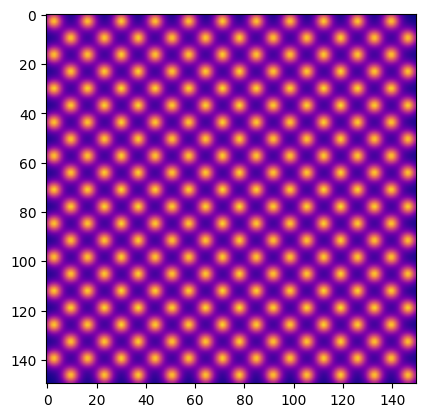

In [ ]:
import matplotlib.pyplot as plt
import os, glob
from jarvis.analysis.stem.convolution_apprx import STEMConv
from jarvis.db.figshare import data, get_jid_data
import matplotlib.pyplot as plt
from jarvis.core.atoms import Atoms, ase_to_atoms, get_supercell_dims
from jarvis.core.lattice import get_2d_lattice
%matplotlib inline
#plt.switch_backend("agg")

#graphene
a = relaxed.atoms #Atoms.from_dict(get_jid_data("JVASP-667")["atoms"])
p = STEMConv(atoms=a,output_size=[150,150]).simulate_surface(a)

plt.imshow(p[0], interpolation="gaussian", cmap="plasma")
# plt.savefig("stem_example.png")
# plt.close()

## X-ray diffraction

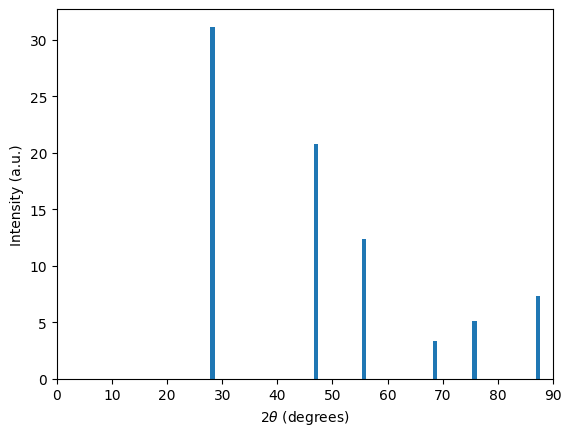

In [ ]:
from jarvis.analysis.diffraction.xrd import XRD
theta,d_hkls,intens = XRD().simulate(atoms=relaxed.atoms)
import matplotlib.pyplot as plt
plt.bar(theta, intens)
plt.xlim(0, 90)
plt.xlabel(r'2$\theta$ (degrees)')
plt.ylabel('Intensity (a.u.)')
plt.show()
